<a href="https://colab.research.google.com/github/Prafulbhoyar45/Alliance-of-Consumer-Complaints-Using-NLP/blob/main/machine_learning_model_that_can_predict_the_number_of_Jets_in_CERN's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Content:

1) Run: The run number of the event.

2) Lumi: The lumi section of the event.

3) Event: The event number of the event.

4) MR: First razor kinematic variable, the MR variable is an estimate of an overall mass scale, which in the limit of massless decay products equals the mass of the heavy parent particle.

5) Rsq: Second razor kinematic variable, the Rsq variable is the square of the ratio R, which quantifies the flow of energy in the plane perpendicular to the beam and the partitioning of momentum between visible and invisible particles.

6,7,8,9) E1,Px1,Py1,Pz1: The four-vector of the leading megajet (with the largest transverse momentum).

10,11,12,13) E2,Px2,Py2,Pz2: The four-vector of the subleading megajet (with the largest transverse momentum).

14) HT: The scalar sum of the transverse momentum of the jets.

15) MET: The magnitude of the vector sum of the transverse energy of the particles in the event.

16) nJets: The number of jets with transverse momentum above 40 GeV.

17) nBJets: The number of b-tagged jets with transverse momentum above 40 GeV.

Source: Kaggle

In [1]:
#Import libraries
import numpy as np
import scipy.optimize as opt
import re, seaborn as sns
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn import preprocessing
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap
%matplotlib inline

In [3]:
# Initilise the drive for dataset
from google.colab import drive

# initilise tyhe path
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Setting Address
import os
os.chdir('/content/drive/My Drive/GitHub_Project_Drive/machine learning model that can predict the number of Jets in CERN') # for fetching the data we require the path

In [5]:
# Read data using pandas
df = pd.read_csv("CERN_Proton_Collision.zip") 
df.head()

Run  Lumi      Event       MR       Rsq        E1      Px1        Py1  \
0  148029   388  302318745  215.553  0.031977  136.7100 -109.893  -54.03420   
1  148029   388  302323641  155.437  0.042157   83.3865   81.150    6.88361   
2  148029   388  302336217  400.563  0.026938  253.1840  139.902  102.64000   
3  148029   388  302382289  286.245  0.094192  175.4860 -156.024  -62.95350   
4  148029   388  302403873  204.514  0.018804  833.7950  100.410  -16.65900   

        Pz1        E2       Px2       Py2       Pz2       HT       MET  nJets  \
0  -58.9032  142.1790   70.0254  41.12250 -116.5130  203.666  18.31100      2   
1  -12.9688   73.9025  -72.2472  11.88350    3.0899  154.659  14.77470      2   
2 -101.9350  535.5510 -110.3790 -89.09290 -516.1790  343.280  25.22110      3   
3  -47.7434  112.8510   89.0843   3.45025   67.9007  257.397  46.02880      2   
4 -827.4980  445.6120  -91.1991  15.55830 -390.1440  269.492   8.11345      3   

   nBJets  
0       0  
1       0  
2       0  
3       0  
4       0

In [6]:
# Find for basics of the dataset
df.dtypes

Run         int64
Lumi        int64
Event       int64
MR        float64
Rsq       float64
E1        float64
Px1       float64
Py1       float64
Pz1       float64
E2        float64
Px2       float64
Py2       float64
Pz2       float64
HT        float64
MET       float64
nJets       int64
nBJets      int64
dtype: object

In [7]:
# In the dataframe, there are 21726 records with 17 columns.

In [8]:
# Find the shape of the data
df.shape

(21726, 17)

In [9]:
# Find wether any null values are there in the data or not
df.isnull().any().any()

False

I want to know how many of each type of Jet are in the data frame, so I create a histogram and pie chart. Before that, I create a data frame containing a number of jets, as follows:

In [10]:
d = {'nJets': ['2 Jets','3 Jets','4 Jets','5 Jets','6 Jets','7 Jets'], 'Numberr of Jets': [14002, 6204, 1325, 169, 23, 3]} 
dfC = pd.DataFrame(data=d)
dfC

nJets  Numberr of Jets
0  2 Jets            14002
1  3 Jets             6204
2  4 Jets             1325
3  5 Jets              169
4  6 Jets               23
5  7 Jets                3

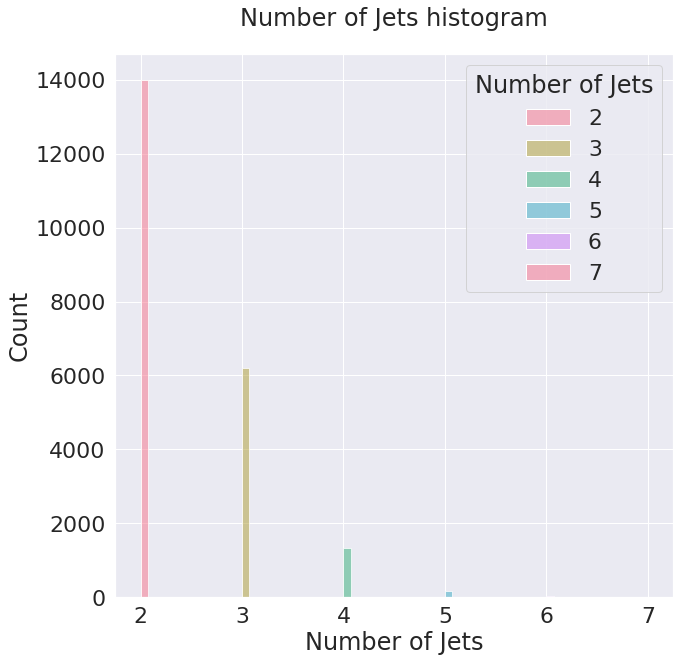

In [11]:
# Jet histogram
# Visualise the data
df1 = df
df1 = df1.rename(columns={'nJets': 'Number of Jets'}) 
plt.figure(figsize=(10, 10))
sns.set(font_scale=2.0)
plt.title("Number of Jets histogram", y=1.04) 
sns.histplot(data=df1, x="Number of Jets", hue="Number of Jets", palette="husl")
plt.show()

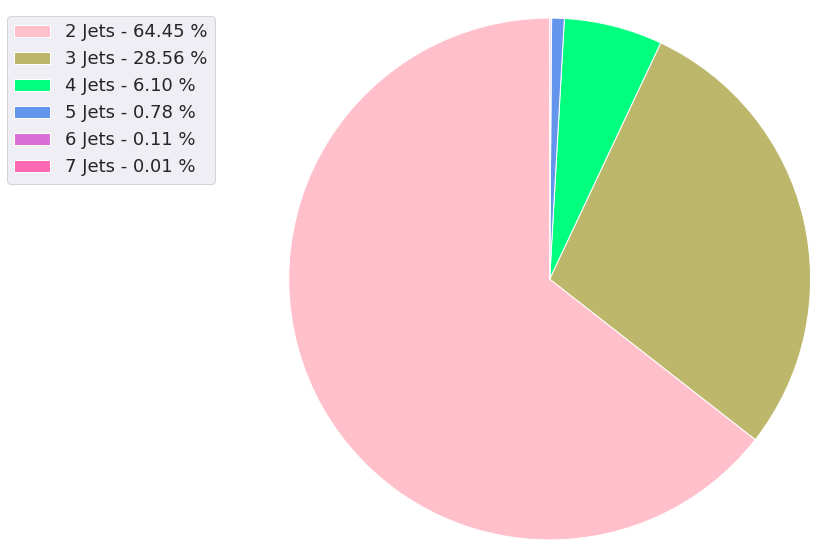

In [12]:
# using Pie chart
plt.figure(figsize=(10, 10))
x = np.char.array(['2 Jets','3 Jets','4 Jets','5 Jets','6 Jets','7 Jets'])
y = np.array([14002, 6204, 1325, 169, 23, 3])
colors = ['pink','darkkhaki','springgreen','cornflowerblue','orchid','hotpink']
percent = 100.*y/y.sum()
patches, texts = plt.pie(y, colors=colors, startangle=90, radius=1.2)
labels = ['{0} - {1:1.2f} %'.format(i,j) for i,j in zip(x, percent)]
sort_legend = True
if sort_legend:
    patches, labels, dummy =  zip(*sorted(zip(patches, labels, y),
                                           key=lambda x: x[2],
                                           reverse=True))
plt.legend(patches, labels, loc='best', bbox_to_anchor=(-0.1, 1.),
            fontsize=18)

plt.savefig('piechart.png', bbox_inches='tight')
plt.show()

Pie chart and histograms show that 5, 6, and 7 Jets have a small percentage of the data frame.

In [14]:
# Descriptive statistics:
df.describe().T

count          mean           std           min           25%  \
Run     21726.0  1.486660e+05  5.960856e+02  1.479260e+05  1.480290e+05   
Lumi    21726.0  9.006935e+02  4.964827e+02  3.880000e+02  4.630000e+02   
Event   21726.0  8.635646e+08  4.786516e+08  3.023155e+08  4.976106e+08   
MR      21726.0  3.519814e+02  1.936914e+02  2.999990e+01  2.297908e+02   
Rsq     21726.0  2.325329e-02  2.329113e-02  8.863570e-06  7.907200e-03   
E1      21726.0  2.971790e+02  2.240400e+02  4.494760e+01  1.435310e+02   
Px1     21726.0  2.832888e-01  9.170125e+01 -5.438210e+02 -7.847298e+01   
Py1     21726.0  7.642112e-01  9.077012e+01 -6.483850e+02 -7.577000e+01   
Pz1     21726.0 -8.523257e+00  3.413668e+02 -2.022310e+03 -1.513477e+02   
E2      21726.0  2.774101e+02  2.068907e+02  4.204860e+01  1.269163e+02   
Px2     21726.0 -3.993847e-01  7.672013e+01 -7.001120e+02 -6.333325e+01   
Py2     21726.0 -9.099383e-01  7.575849e+01 -4.598010e+02 -6.270645e+01   
Pz2     21726.0 -1.915512e+00  3.214151e+02 -1.647600e+03 -1.542318e+02   
HT      21726.0  2.423283e+02  7.884153e+01  1.209380e+02  1.932520e+02   
MET     21726.0  1.600537e+01  1.079788e+01  1.004450e-01  8.626845e+00   
nJets   21726.0  2.435791e+00  6.557501e-01  2.000000e+00  2.000000e+00   
nBJets  21726.0  5.366842e-02  2.363340e-01  0.000000e+00  0.000000e+00   

                 50%           75%           max  
Run     1.491810e+05  1.491810e+05  1.491810e+05  
Lumi    9.860000e+02  9.990000e+02  1.804000e+03  
Event   9.709389e+08  9.844834e+08  1.703645e+09  
MR      2.929110e+02  4.068830e+02  2.433820e+03  
Rsq     1.681655e-02  3.161232e-02  7.636950e-01  
E1      2.120605e+02  3.745428e+02  2.101580e+03  
Px1    -3.105090e-01  7.856248e+01  7.222910e+02  
Py1     1.238670e+00  7.773807e+01  4.702340e+02  
Pz1    -5.478110e+00  1.353452e+02  2.061890e+03  
E2      2.041400e+02  3.667105e+02  1.843360e+03  
Px2    -5.482085e-01  6.285202e+01  4.053260e+02  
Py2    -1.900460e+00  6.111155e+01  6.357340e+02  
Pz2    -1.803295e+00  1.511678e+02  1.830370e+03  
HT      2.236960e+02  2.692415e+02  1.462630e+03  
MET     1.403500e+01  2.109105e+01  4.231440e+02  
nJets   2.000000e+00  3.000000e+00  7.000000e+00  
nBJets  0.000000e+00  0.000000e+00  2.000000e+00

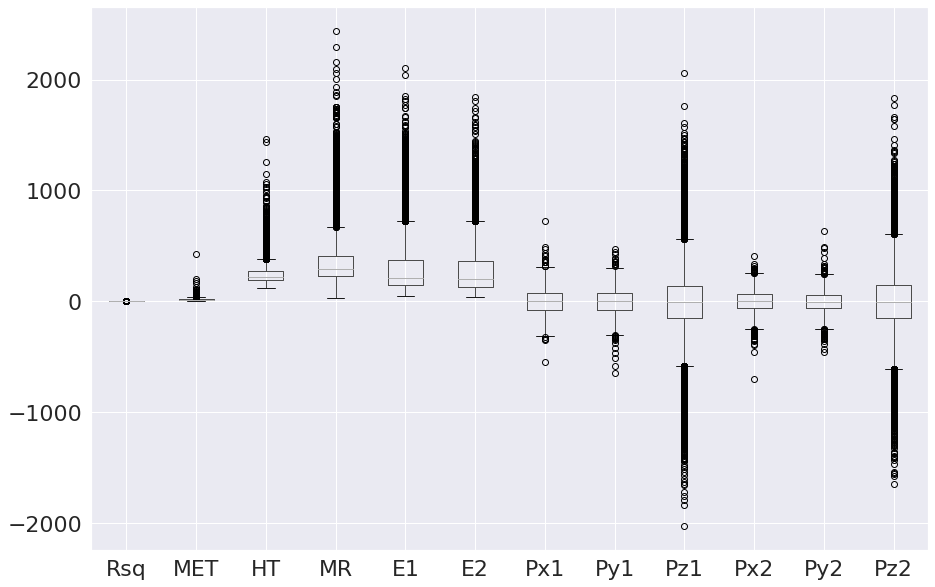

In [15]:
# Boxplots and outliers
plt.figure(figsize=(15, 10))
boxplot = df.boxplot(column=['Rsq', 'MET', 'HT', 'MR', 'E1', 'E2', 'Px1', 'Py1', 'Pz1', 'Px2', 'Py2', 'Pz2'])
plt.show()

I use the Seaborn heatmap() function to determine which features have the most impact on nJets.

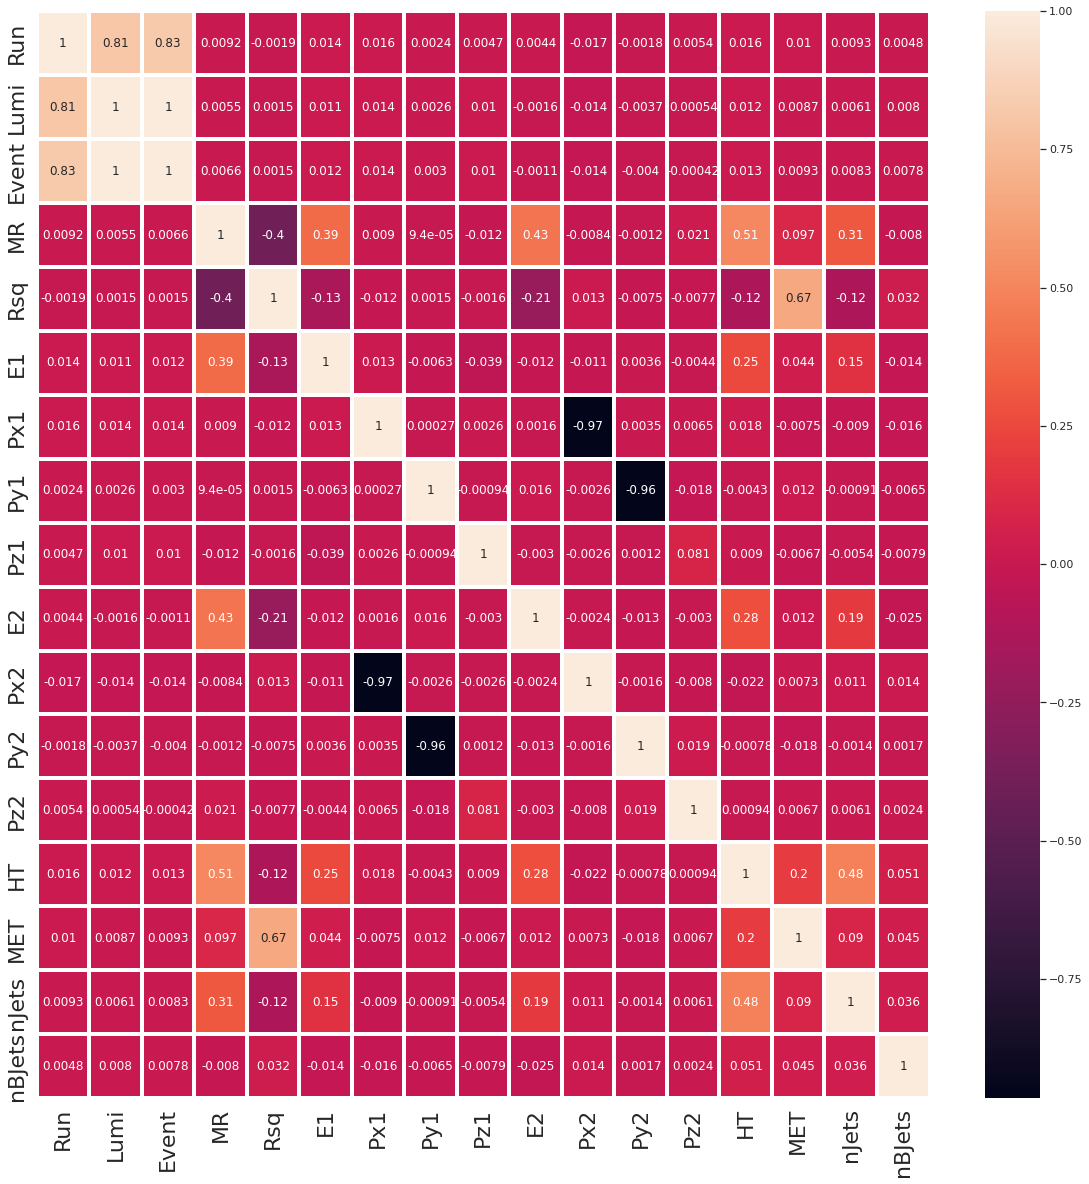

In [16]:
fig, ax = plt.subplots(figsize=(20,20))  
sns.set(font_scale=1.0)
sns.heatmap(df.corr() , annot= True, linewidths=3, ax=ax)
plt.show()

In [17]:
# Number of Jets is greatly influenced by:
d = {'Number of Jets is greatly influenced by:': ['HT', 'MR', 'E2', 'E1'], 'correlation coefficient': [0.48, 0.31, 0.19, 0.15]}
dfC = pd.DataFrame(data=d)
dfC

Number of Jets is greatly influenced by:  correlation coefficient
0                                       HT                     0.48
1                                       MR                     0.31
2                                       E2                     0.19
3                                       E1                     0.15

In [18]:
# Data Visualization and Analysis:
plt.figure(figsize=(10, 8))
sns.set(font_scale=2.0)
sns.pairplot(df)

<Figure size 720x576 with 0 Axes>

Error in callback <function flush_figures at 0x7fd3ffe51290> (for post_execute):


KeyboardInterrupt: ignored

I would like to plot more details on some of these graphs in 2D and 3D.

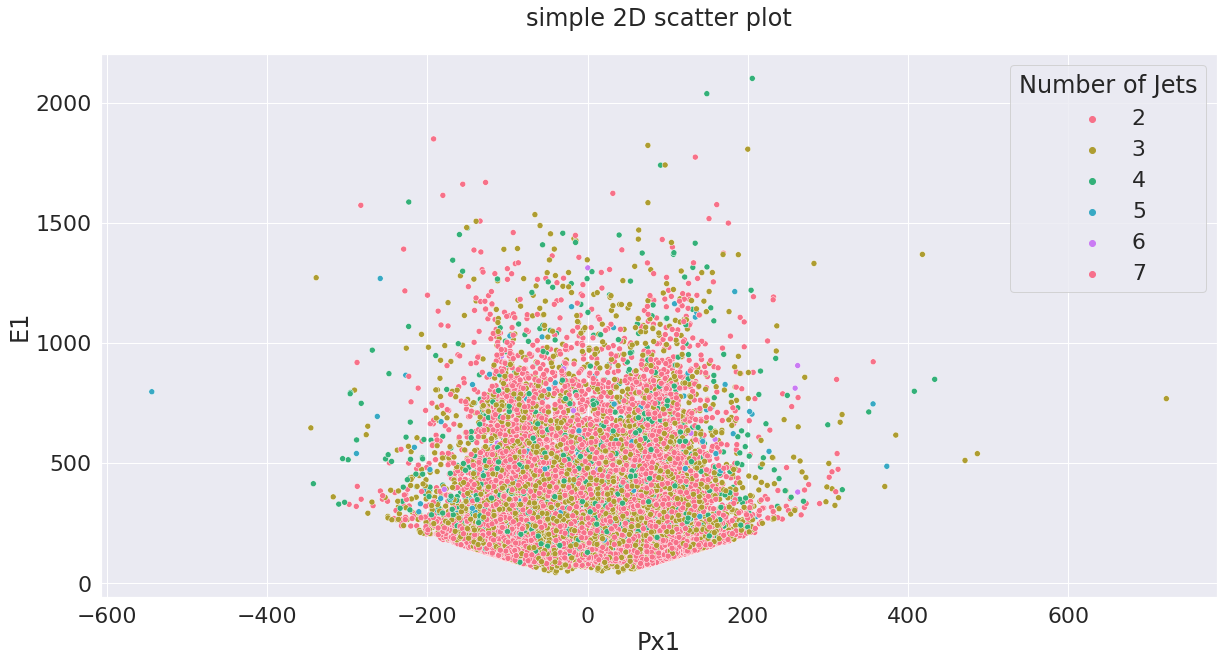

In [19]:
# 1. E1 vs Px1
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df1, x='Px1', y='E1', hue='Number of Jets', palette="husl")
plt.show()

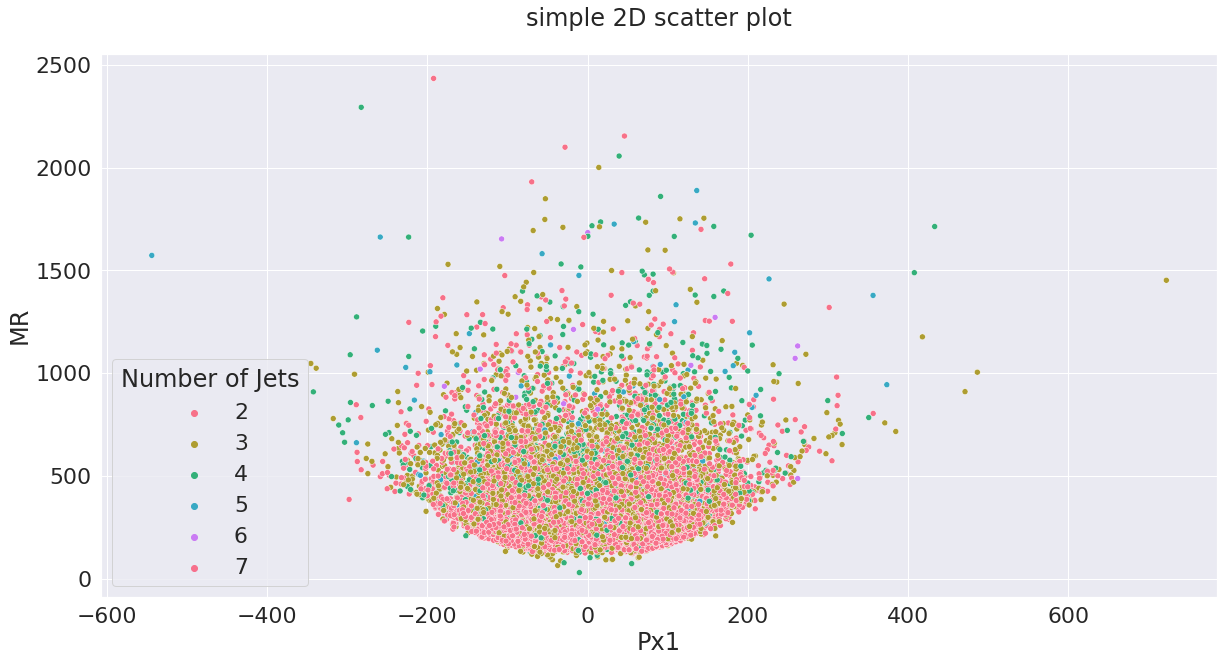

In [20]:
# 2. MR vs Px1
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df1, x='Px1', y='MR', hue='Number of Jets', palette="husl")
plt.show()

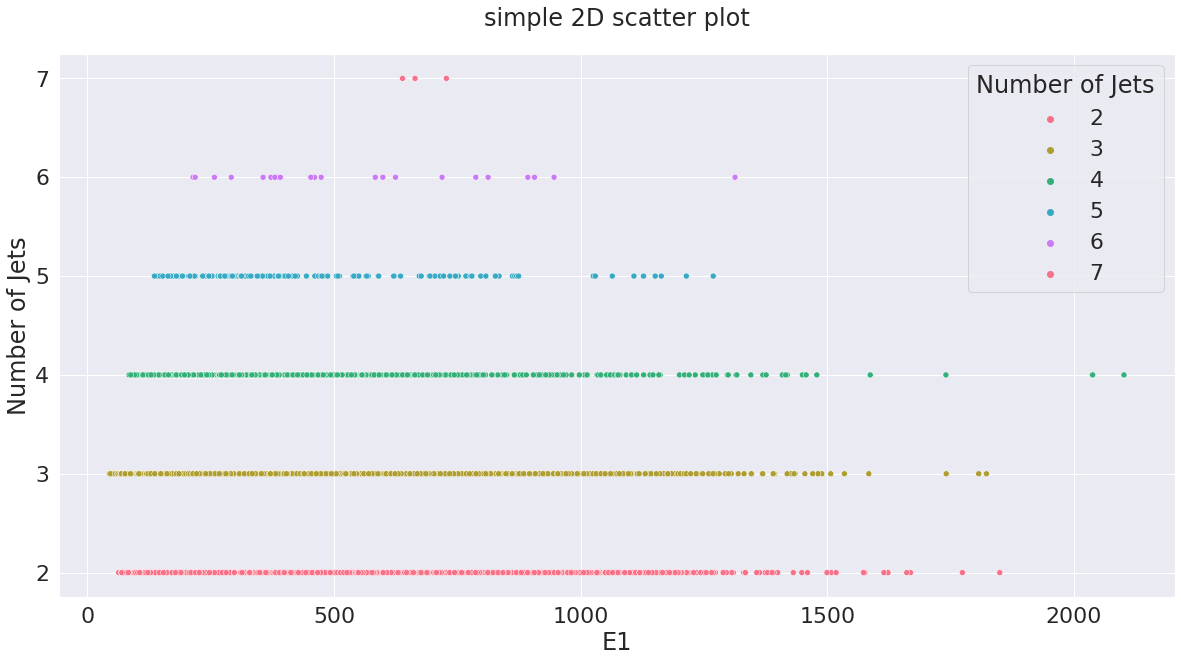

In [21]:
# 3. Number of Jets vs E1
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df1, x='E1', y='Number of Jets', hue='Number of Jets', palette="husl")
plt.show()


 - The seven-jet phenomenon can only be spotted in 500 < E1 < 1000
 - The four-jet phenomenon is only a phenomenon that can be spotted in E1>2000

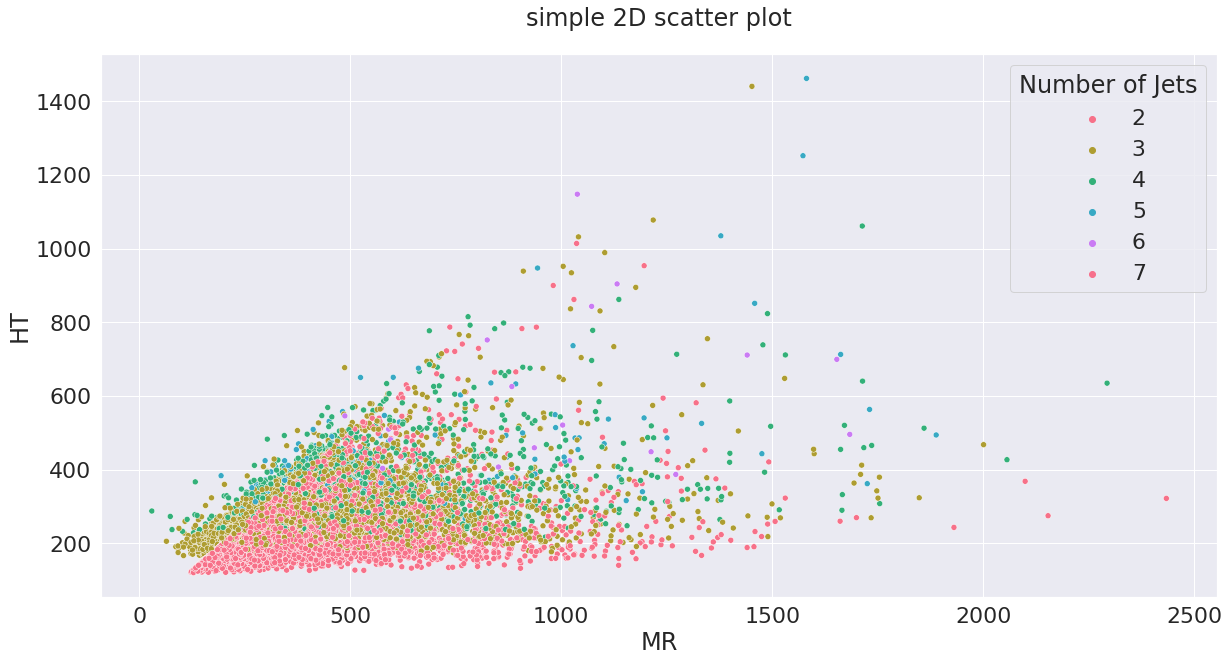

In [22]:
# 4. HT vs MR
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df1, x='MR', y='HT', hue='Number of Jets', palette="husl")
plt.show()

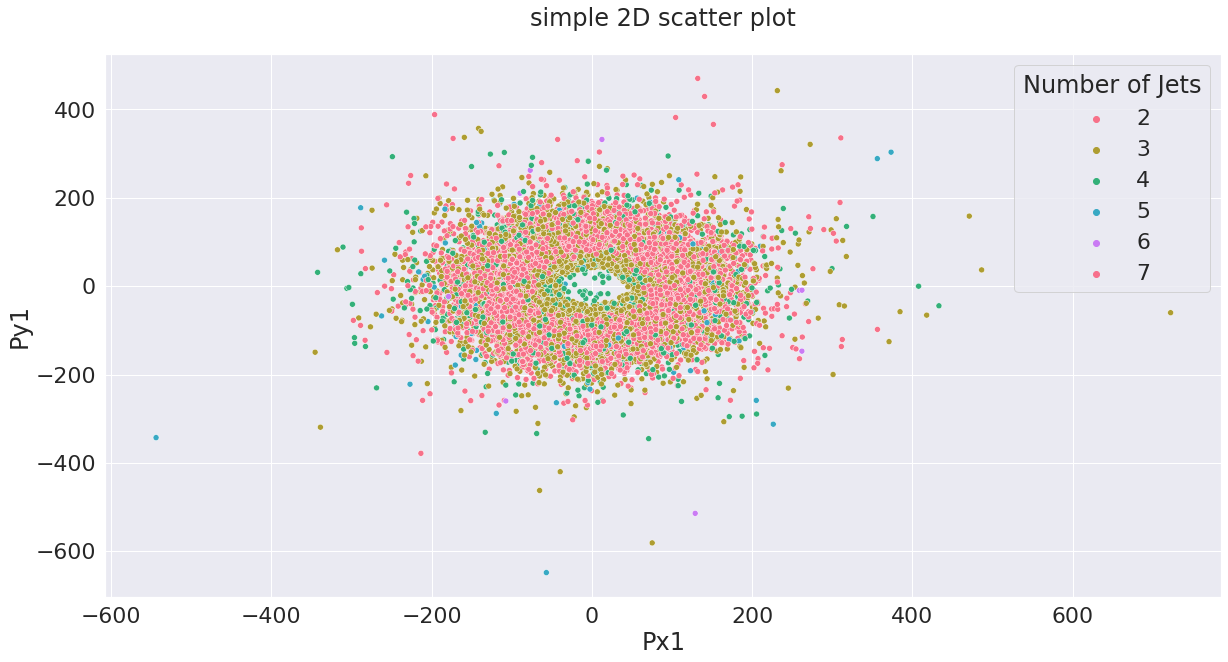

In [23]:
# 4. Py1 vs Px1
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df1, x='Px1', y='Py1', hue='Number of Jets', palette="husl")
plt.show()

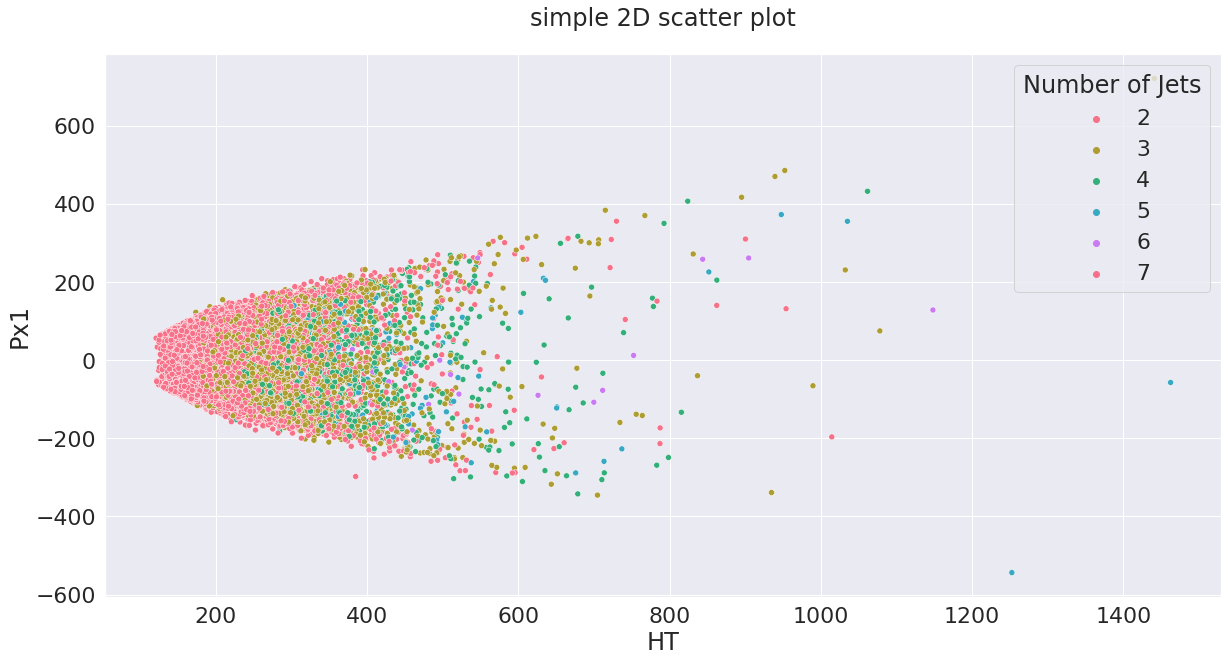

In [24]:
# 5. Px1 vs HT
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df1, x='HT', y='Px1', hue='Number of Jets', palette="husl")
plt.show()

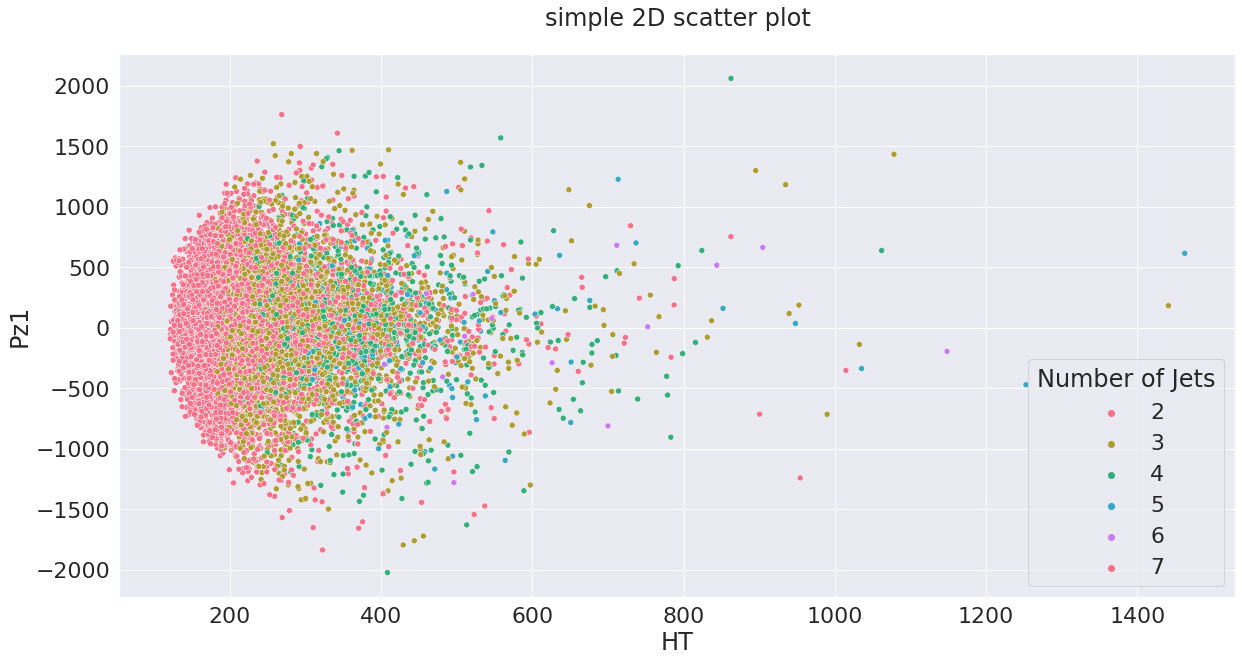

In [25]:
# 6. Pz1 vs HT
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df1, x='HT', y='Pz1', hue='Number of Jets', palette="husl")
plt.show()

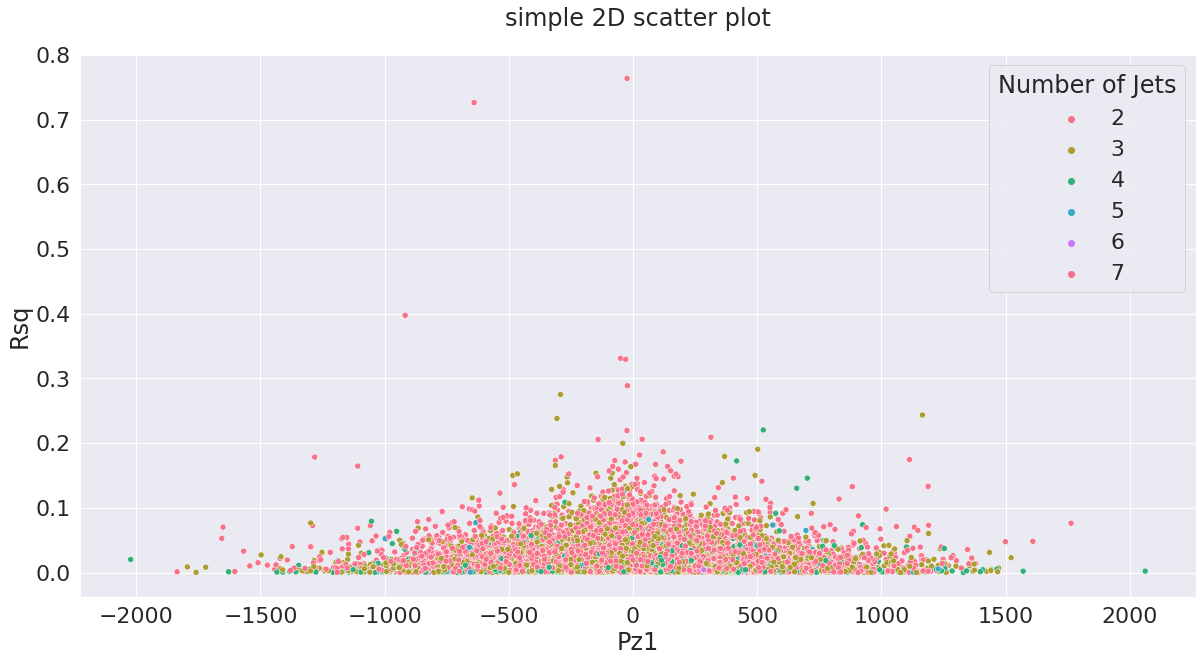

In [26]:
# 7. Rsq vs Pz1
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df1, x='Pz1', y='Rsq', hue='Number of Jets', palette="husl")
plt.show()

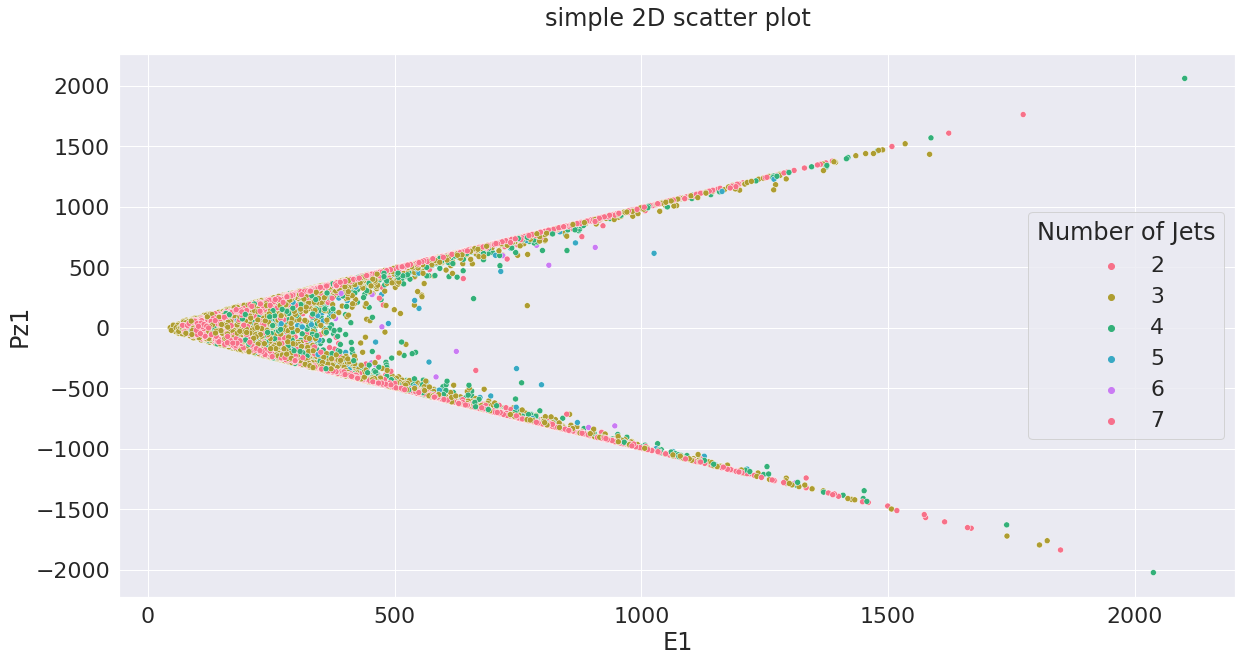

In [28]:
# 8. Pz1 vs E1
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df1, x='E1', y='Pz1', hue='Number of Jets', palette="husl")
plt.show()

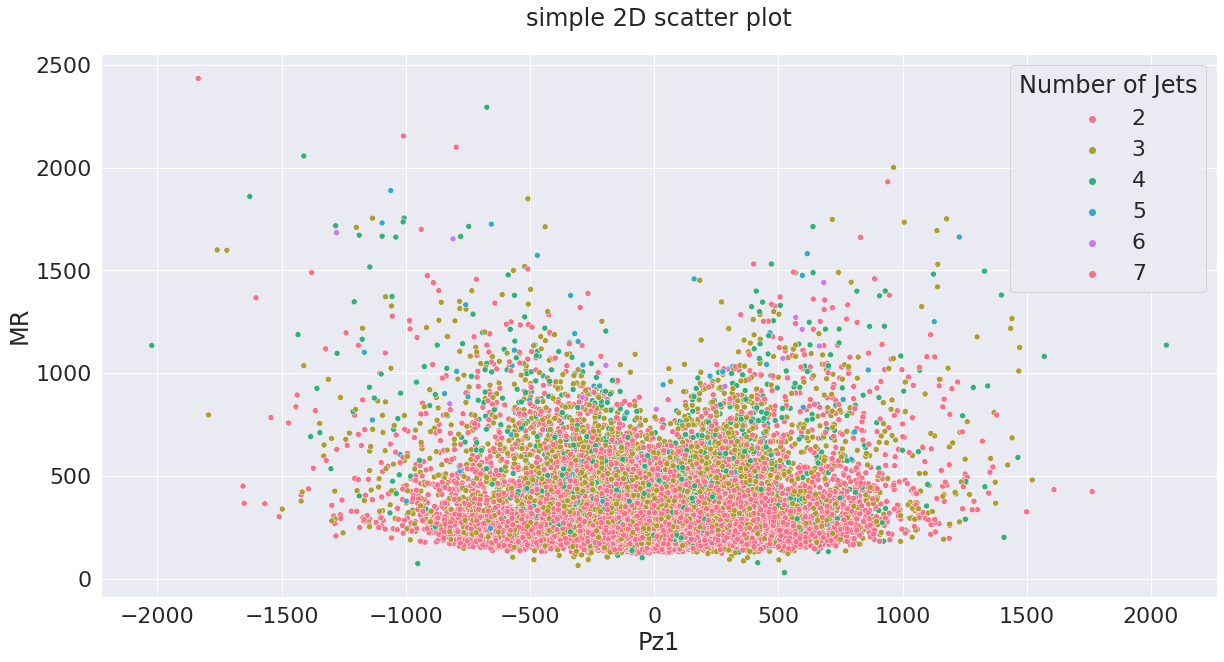

In [29]:
# 9. MR vs Pz1
plt.figure(figsize=(20, 10))
sns.set(font_scale=2.0)
plt.title("simple 2D scatter plot", y=1.04)
sns.scatterplot(data=df1, x='Pz1', y='MR', hue='Number of Jets', palette="husl")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # This is added back by InteractiveShellApp.init_path()


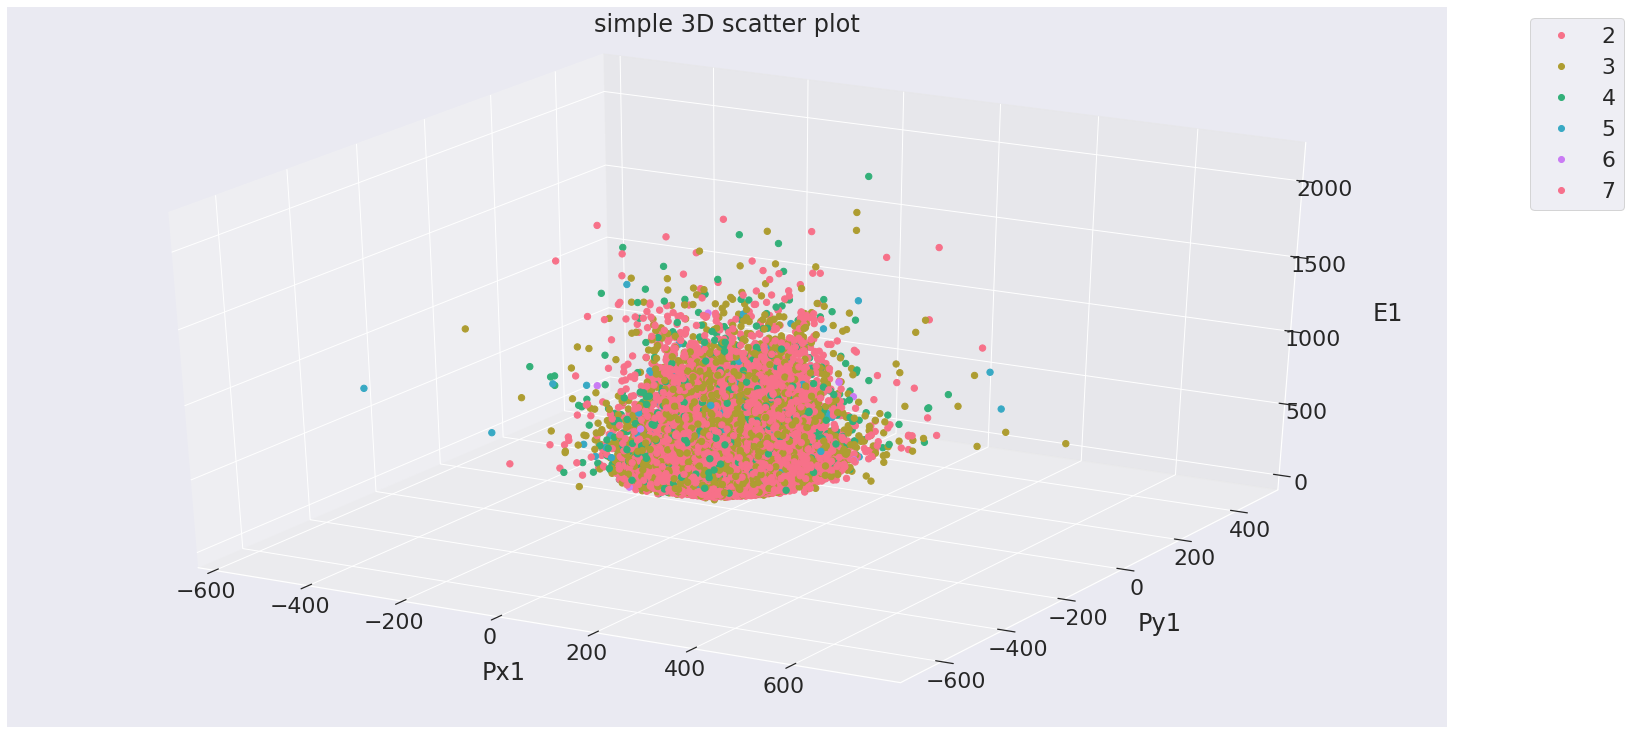

In [31]:
# 3D scatter plots
# 1. E1 vs Px1 vs Py1
# generate data
x = df['Px1']
y = df['Py1']
z = df['E1']  

# axes instance
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=df['nJets'], marker='o', cmap=cmap, alpha=1)

plt.title("simple 3D scatter plot", y=1.04)

ax.set_xlabel('Px1')
ax.set_xlabel('Px1', labelpad=30)

ax.set_ylabel('Py1')
ax.set_ylabel('Py1', labelpad=30)

ax.set_zlabel('E1')
ax.set_zlabel('E1', labelpad=30)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


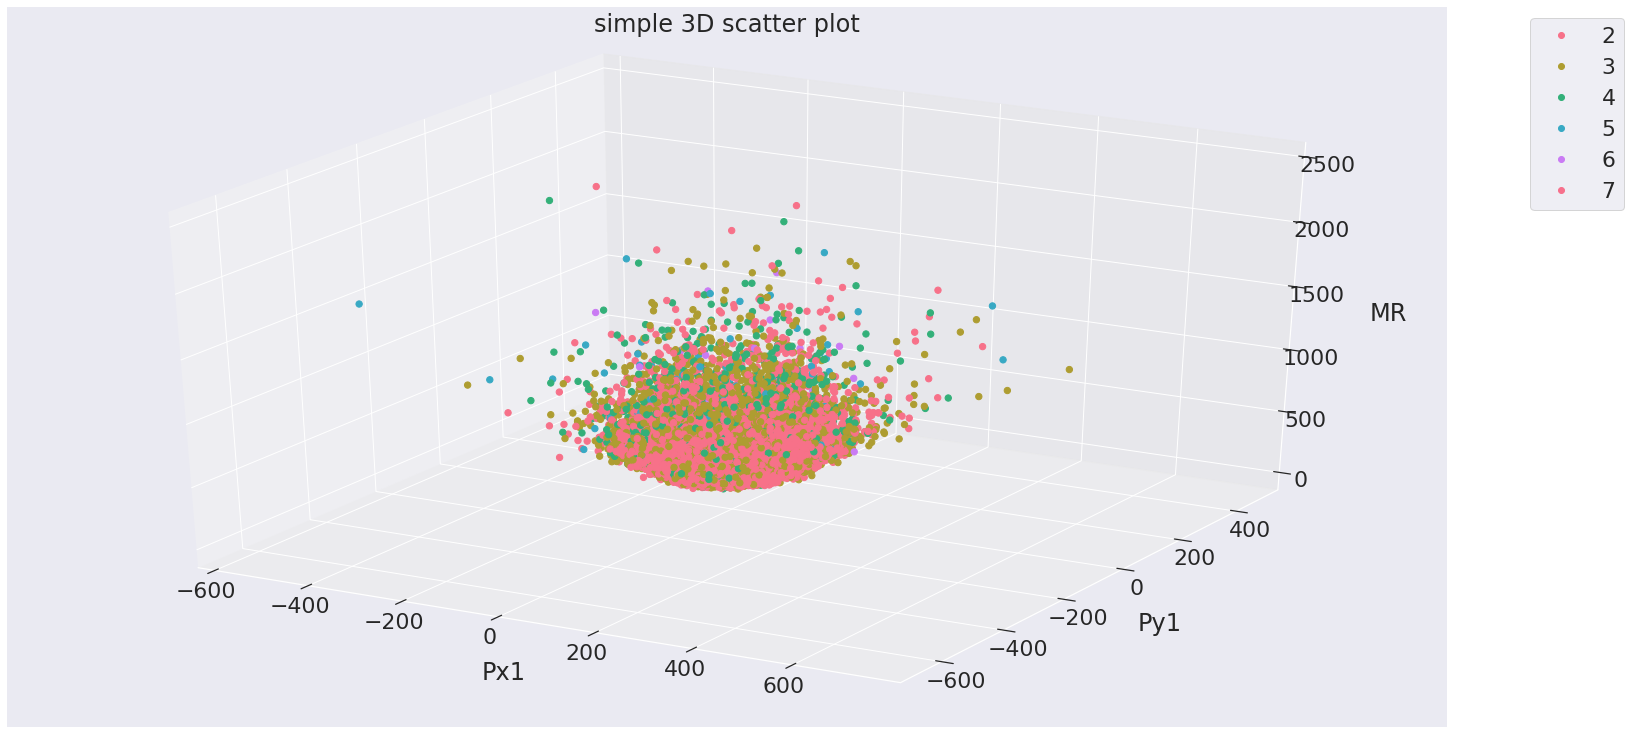

In [32]:
# 2. MR vs Px1 vs Py1
# generate data
x = df['Px1']
y = df['Py1']
z = df['MR']  

# axes instance
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=df['nJets'], marker='o', cmap=cmap, alpha=1)

plt.title("simple 3D scatter plot", y=1.04)

ax.set_xlabel('Px1')
ax.set_xlabel('Px1', labelpad=30)

ax.set_ylabel('Py1')
ax.set_ylabel('Py1', labelpad=30)

ax.set_zlabel('MR')
ax.set_zlabel('MR', labelpad=30)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.


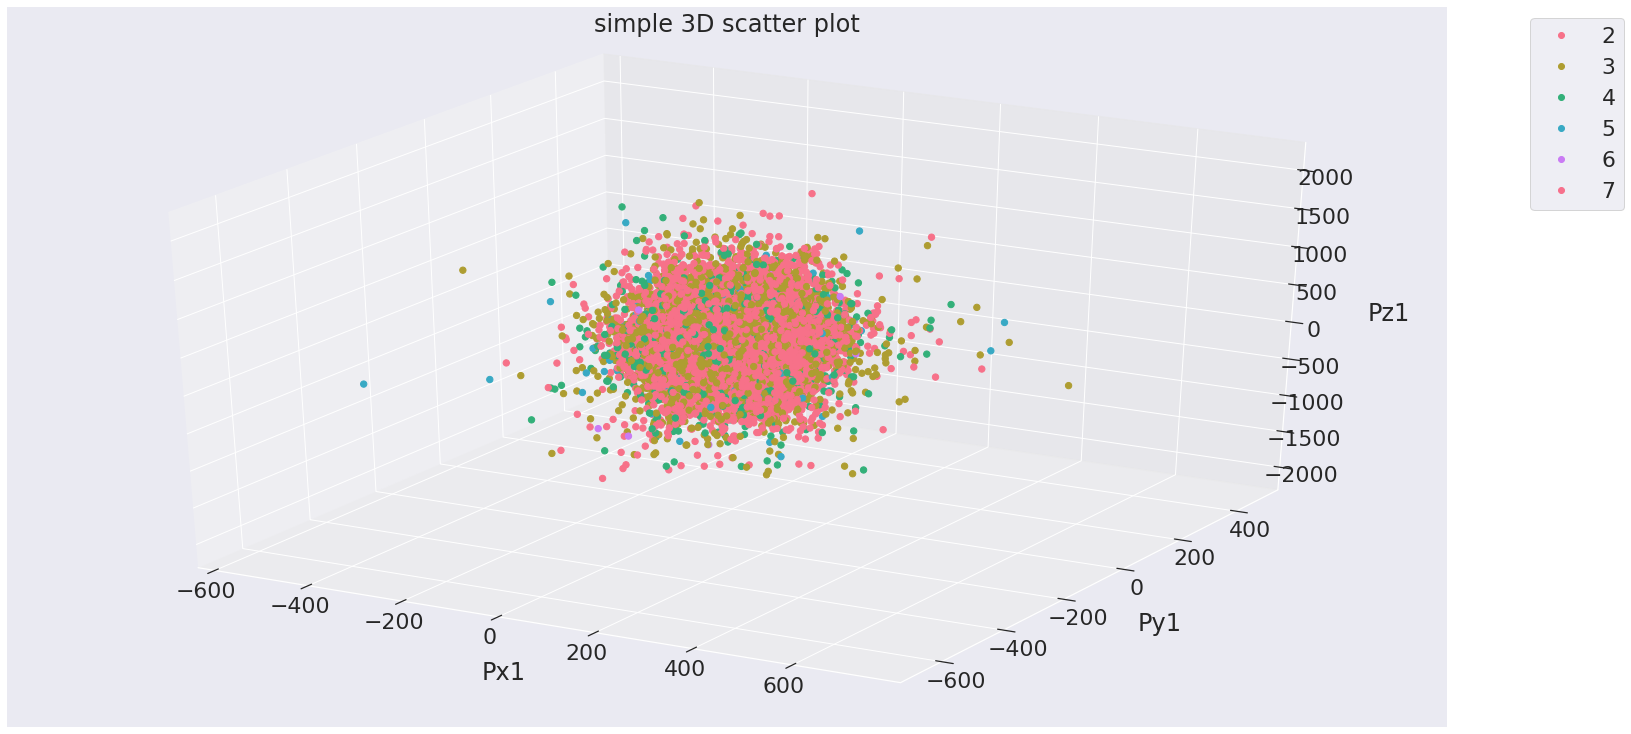

In [33]:
#3. Px1 vs Py1 vs Pz1
# generate data
x = df['Px1']
y = df['Py1']
z = df['Pz1']  

# axes instance
fig = plt.figure(figsize=(20,10))
ax = Axes3D(fig)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=df['nJets'], marker='o', cmap=cmap, alpha=1)

plt.title("simple 3D scatter plot", y=1.04)

ax.set_xlabel('Px1')
ax.set_xlabel('Px1', labelpad=30)

ax.set_ylabel('Py1')
ax.set_ylabel('Py1', labelpad=30)

ax.set_zlabel('Pz1')
ax.set_zlabel('Pz1', labelpad=30)

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

The next step is to create a model to predict the number of Jets using TensorFlow.

I first split the DataFrame into X (data) and Y (labels), where:

In [34]:
df.nJets = df.nJets.map({2: 0, 3: 1, 4: 2, 5: 3, 6: 4, 7: 5}) 
X = df.drop(['nJets'], axis=1)
y = df['nJets']

Using a train-test split, I split X and Y into train and test data.
 - Train Dataset: Used to fit model.
 - Test Dataset: Used to evaluate the fit model.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

## TensorFlow
The first thing I do is train a simple Neural Network using TensorFlow, and then plot accuracy and loss graphs on the training and validation datasets to find a balance between the model that is underfitting and one that is overfitting, resulting in a model with a good fit. I first need to convert the train and test data into a TensorFlow tensor.

In [36]:
# To convert DataFrame to a tensor, I use tf.convert_to_tensor
tf.convert_to_tensor(X_train)

<tf.Tensor: shape=(17380, 16), dtype=float64, numpy=
array([[1.49181000e+05, 1.78900000e+03, 1.69174702e+09, ...,
        2.03114000e+02, 3.19493000e+01, 0.00000000e+00],
       [1.49181000e+05, 1.78900000e+03, 1.69145596e+09, ...,
        2.63641000e+02, 2.26033000e+01, 0.00000000e+00],
       [1.49181000e+05, 9.98000000e+02, 9.83597837e+08, ...,
        2.45781000e+02, 7.92845000e+00, 0.00000000e+00],
       ...,
       [1.47926000e+05, 4.62000000e+02, 4.98088038e+08, ...,
        1.92466000e+02, 6.30772000e+00, 0.00000000e+00],
       [1.48029000e+05, 3.89000000e+02, 3.03389516e+08, ...,
        2.12675000e+02, 2.12651000e+00, 0.00000000e+00],
       [1.49181000e+05, 9.99000000e+02, 9.84587251e+08, ...,
        3.00290000e+02, 2.97415000e+01, 0.00000000e+00]])>

In [37]:
tf.convert_to_tensor(X_test)

<tf.Tensor: shape=(4346, 16), dtype=float64, numpy=
array([[1.49181000e+05, 9.97000000e+02, 9.81749868e+08, ...,
        2.90486000e+02, 1.44300000e+01, 1.00000000e+00],
       [1.47926000e+05, 4.62000000e+02, 4.98113369e+08, ...,
        4.01390000e+02, 2.13951000e+01, 0.00000000e+00],
       [1.49181000e+05, 9.98000000e+02, 9.83048402e+08, ...,
        7.05866000e+02, 3.01095000e+01, 0.00000000e+00],
       ...,
       [1.49181000e+05, 9.86000000e+02, 9.71262564e+08, ...,
        1.81506000e+02, 1.81312000e+01, 0.00000000e+00],
       [1.49181000e+05, 9.86000000e+02, 9.71122660e+08, ...,
        1.75923000e+02, 2.72315000e+01, 0.00000000e+00],
       [1.47926000e+05, 4.63000000e+02, 4.98614290e+08, ...,
        2.08791000e+02, 1.53762000e+01, 0.00000000e+00]])>

In [38]:
# Normalize X_train, X_test
X_train_scaled = tf.keras.layers.Normalization(axis=-1)
X_train_scaled.adapt(X_train)
X_test_scaled = tf.keras.layers.Normalization(axis=-1)
X_test_scaled.adapt(X_test)

### Building a simple neural network model
The compile function takes three arguments: optimizer, loss, and metrics.

 - Optimizer: These are certain algorithms that are used to change the  - attributes of the neural network to decrease the loss rate.
 - Loss: This is used to compute the quantity that a model should seek to minimize during training.
 - Metrics: This is used to judge the performance of the model.

# Model 1: There are two hidden layers, each with 16 neurons and an activation function of sigmoid, epochs = 4000, and batch_size = 400

In [39]:
def get_basic_model():
  model = tf.keras.Sequential([
    X_train_scaled,
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax) 
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model
model = get_basic_model()
history = model.fit(X_train, y_train, epochs=4000, validation_data=(X_test, y_test), batch_size=400)

Streaming output truncated to the last 5000 lines.
44/44 [==============================] - 0s 4ms/step - loss: 0.3253 - accuracy: 0.8738 - val_loss: 0.3280 - val_accuracy: 0.8755
Epoch 1502/4000
44/44 [==============================] - 0s 4ms/step - loss: 0.3239 - accuracy: 0.8743 - val_loss: 0.3291 - val_accuracy: 0.8764
Epoch 1503/4000
44/44 [==============================] - 0s 4ms/step - loss: 0.3246 - accuracy: 0.8742 - val_loss: 0.3278 - val_accuracy: 0.8755
Epoch 1504/4000
44/44 [==============================] - 0s 5ms/step - loss: 0.3242 - accuracy: 0.8742 - val_loss: 0.3300 - val_accuracy: 0.8737
Epoch 1505/4000
44/44 [==============================] - 0s 4ms/step - loss: 0.3230 - accuracy: 0.8751 - val_loss: 0.3273 - val_accuracy: 0.8741
Epoch 1506/4000
44/44 [==============================] - 0s 5ms/step - loss: 0.3234 - accuracy: 0.8751 - val_loss: 0.3280 - val_accuracy: 0.8744
Epoch 1507/4000
44/44 [==============================] - 0s 4ms/step - loss: 0.3240 - accuracy:

### Evaluate the model
I create plots from the collected history data.

 - A plot of accuracy on the training and validation datasets over training epochs.
 - A plot of loss on the training and validation datasets over training epochs.

136/136 - 0s - loss: 0.2930 - accuracy: 0.8914 - 247ms/epoch - 2ms/step


findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


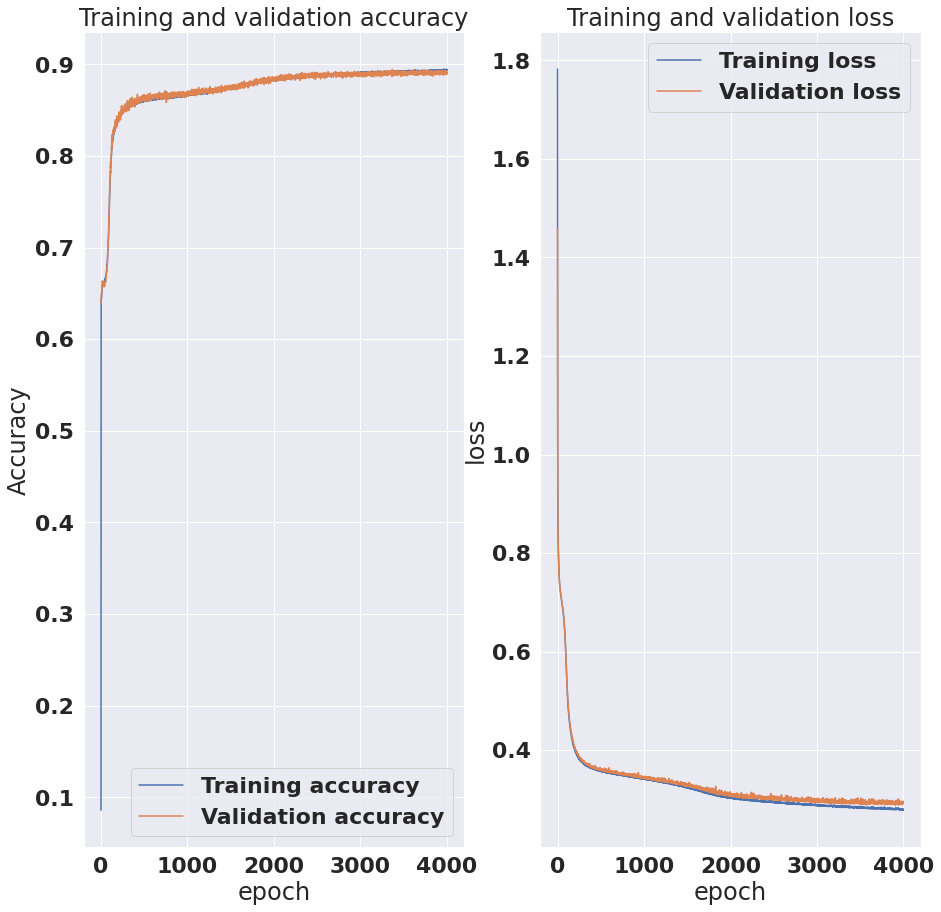

In [40]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(figsize=(15,15))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label = 'Validation accuracy') 
ax1.set_title("Training and validation accuracy")
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_title("Training and validation loss")
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(loc='upper right')
#To check the network accuracy on test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
plt.show()

According to the plot of loss, validation loss is decreasing before the 2000th epoch, so the model is underfitting. However, after the 2000th epoch, Validation loss converges to 0.28, indicating that the model is balanced. After the 2000th epoch, when the model is either perfectly fitted or in a local minimum, the neural network model achieved an accuracy of 89%. The goal of Deep Learning training is to find a balance between a model that is underfitting and one that is overfitting(converging), resulting in a model with a good fit. I found an optimum where the change in the slope of loss is around the 2000th epoch, as shown above. At that point, the training process can be stopped.

# Model 2: There are two hidden layers, each with 16 neurons and an activation function of sigmoid, epochs = 7000, and batch_size = 300

In [41]:
def get_basic_model():
  model = tf.keras.Sequential([
    X_train_scaled,
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(16, activation='sigmoid'),
    tf.keras.layers.Dense(6, activation=tf.nn.softmax) 
  ])

  model.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model
model = get_basic_model()
history = model.fit(X_train, y_train, epochs=7000, validation_data=(X_test, y_test), batch_size=300)

Streaming output truncated to the last 5000 lines.
58/58 [==============================] - 0s 5ms/step - loss: 0.2890 - accuracy: 0.8904 - val_loss: 0.3094 - val_accuracy: 0.8909
Epoch 4502/7000
58/58 [==============================] - 0s 5ms/step - loss: 0.2898 - accuracy: 0.8895 - val_loss: 0.3058 - val_accuracy: 0.8886
Epoch 4503/7000
58/58 [==============================] - 0s 5ms/step - loss: 0.2874 - accuracy: 0.8906 - val_loss: 0.3096 - val_accuracy: 0.8900
Epoch 4504/7000
58/58 [==============================] - 0s 4ms/step - loss: 0.2859 - accuracy: 0.8910 - val_loss: 0.3078 - val_accuracy: 0.8873
Epoch 4505/7000
58/58 [==============================] - 0s 5ms/step - loss: 0.2852 - accuracy: 0.8913 - val_loss: 0.3094 - val_accuracy: 0.8882
Epoch 4506/7000
58/58 [==============================] - 0s 4ms/step - loss: 0.2848 - accuracy: 0.8906 - val_loss: 0.3115 - val_accuracy: 0.8886
Epoch 4507/7000
58/58 [==============================] - 0s 4ms/step - loss: 0.2870 - accuracy:

136/136 - 0s - loss: 0.3101 - accuracy: 0.8884 - 254ms/epoch - 2ms/step


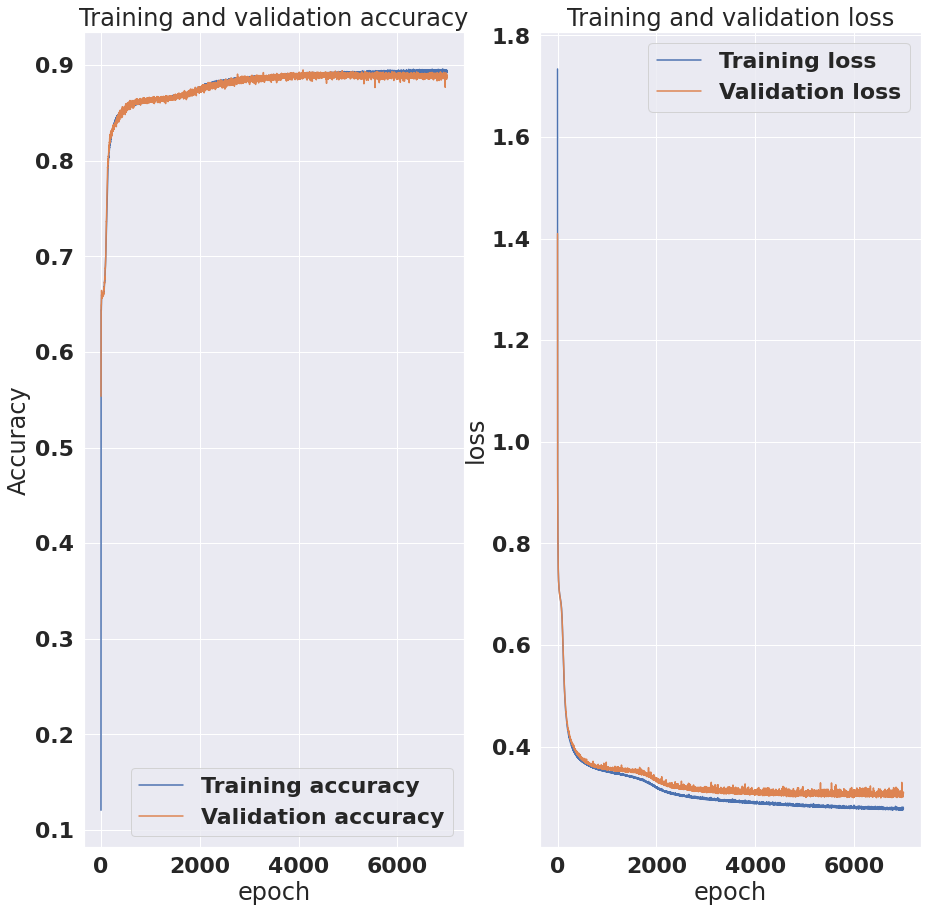

In [42]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 18}

plt.rc('font', **font)

plt.figure(figsize=(15,15))

ax1 = plt.subplot(121)
ax2 = plt.subplot(122)

ax1.plot(history.history['accuracy'], label='Training accuracy')
ax1.plot(history.history['val_accuracy'], label = 'Validation accuracy') 
ax1.set_title("Training and validation accuracy")
ax1.set(xlabel='epoch', ylabel='Accuracy')
ax1.legend(loc='lower right')

ax2.plot(history.history['loss'], label='Training loss')
ax2.plot(history.history['val_loss'], label='Validation loss')
ax2.set_title("Training and validation loss")
ax2.set(xlabel='epoch', ylabel='loss')
ax2.legend(loc='upper right')
#To check the network accuracy on test data
test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)
plt.show()

According to the plot of loss, validation loss is decreasing before the 4000th epoch, so the model is underfitting. However, after the 4000th epoch, Validation loss converges to 0.2, indicating that the model is balanced. After the 4000th epoch, when the model is either perfectly fitted or in a local minimum, the neural network model achieved an accuracy of 92%. I found an optimum where the change in the slope of loss is around the 4000th epoch, as shown above. At that point, the training process can be stopped.

# Conclusion
In terms of the number of hidden layers and neurons and their activation function, Model 1 and Model 2 are similar. However, by increasing the batch_size and epochs, which give the model more time to train, the accuracy has increased by 3%. To achieve high accuracy, it is sometimes better to test different batch_sizes for a model than to use complicated structures.